In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
cd '/content/drive/My Drive/Colab Notebooks/dml-project/all'

[Errno 2] No such file or directory: '/content/drive/My Drive/Colab Notebooks/dml-project/all'
/Users/jannes/Google Drive (polymaxim@gmail.com)/Colab Notebooks/dml-project


In [7]:
ls

Icon?                                pneu_keras_model.csv
all/                                 ssd_keras/
baseline_model (1).ipynb             ssd_keras-master/
baseline_model.ipynb                 tr_learn/
dftest.pickle                        transfer_learning.ipynb
dftrain.pickle                       transfer_learning[Konflikt 1].ipynb
model (1).h5                         transfer_learning[Konflikt 2].ipynb
model.h5                             transfer_learning[Konflikt 3].ipynb
model_2.h5                           transfer_learning[Konflikt].ipynb
model_3.h5


In [10]:
cd 'all'

/Users/jannes/Google Drive (polymaxim@gmail.com)/Colab Notebooks/dml-project/all


In [ ]:
import sys
sys.path.insert(0, '/content/drive/My Drive/Colab Notebooks/dml-project/tr_learn/CheXNet')

In [13]:
#Local
import sys
sys.path.insert(0, '../tr_learn/CheXNet')

In [14]:
from models import keras as models
from keras.models import Model, load_model
from keras.layers import Input, Dense, Activation

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [507]:
m = models.ModelFactory()

In [508]:
m2 = m.get_model(class_names=[i for i in range(14)], 
            weights_path='/content/drive/My Drive/Colab Notebooks/dml-project/tr_learn/brucechou1983_CheXNet_Keras_0.3.0_weights.h5')

KeyboardInterrupt: 

In [10]:
m2.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_3 (ZeroPadding2D (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_3[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
__________________________________________________________________________________________________
conv1/relu

In [11]:
from keras.models import Model, load_model
from keras.layers import Input, Dense, Activation, Flatten

m2.layers.pop()
o = Dense(2, activation='sigmoid', name='loss')(m2.layers[-1].output)

model2 = Model(input=m2.input, output=[o])
model2.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=[<tf.Tenso...)`
  import sys


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_3 (ZeroPadding2D (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_3[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
__________________________________________________________________________________________________
conv1/relu

In [15]:
from numpy.random import seed
seed(101)
from tensorflow import set_random_seed
set_random_seed(101)

import pandas as pd
import numpy as np
import math
!pip install pydicom
import pydicom
import pylab
import os
import pickle

from sklearn.model_selection import train_test_split
from skimage.transform import resize

import matplotlib.pyplot as plt
%matplotlib inline


# Don't Show Warning Messages
import warnings
warnings.filterwarnings('ignore')

import gc; gc.enable()

In [16]:
### Generators

In [17]:
label_data = pd.read_csv('./stage_1_train_labels.csv')

In [18]:
dum = pd.get_dummies(label_data['Target'])

In [19]:
dum.columns = ['Target_0', 'Target_1']

In [20]:
label_data = pd.concat([label_data, dum], axis=1) 

In [21]:
label_data['Finding Labels'] = label_data['Target']

In [22]:
label_data['Image Index'] = label_data['patientId'].apply(lambda x: x + '.jpg')

In [23]:
label_data['Patient ID'] = label_data['patientId']

In [24]:
label_data = label_data[['Image Index', 'Patient ID', 'Finding Labels', 'Target_0','Target_1']]

In [25]:
label_data.head()

,Image Index,Patient ID,Finding Labels,Target_0,Target_1
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6.jpg,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0,1,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd.jpg,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,0,1,0
2,00322d4d-1c29-4943-afc9-b6754be640eb.jpg,00322d4d-1c29-4943-afc9-b6754be640eb,0,1,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5.jpg,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,0,1,0
4,00436515-870c-4b36-a041-de91049b9ab4.jpg,00436515-870c-4b36-a041-de91049b9ab4,1,0,1


In [26]:
df_train_images, df_val_images = train_test_split(label_data, test_size=0.20,
                                                   random_state=5)

In [27]:
df_train_images.to_csv('train.csv')
df_val_images.to_csv('dev.csv')

In [28]:
ls

GCP Credits Request Link - RSNA.txt  rest_test.csv
Icon?                                stage_1_detailed_class_info.csv
Untitled.ipynb                       stage_1_sample_submission.csv
bbox_data.csv                        stage_1_test_images/
best_auroc.log                       stage_1_test_images_jpg/
best_weights_trf_learn_1.h5          stage_1_train_images/
bounding_box.txt                     stage_1_train_images_jpg/
bounding_box_test.txt                stage_1_train_labels.csv
cam_2/                               stage_1_train_labels_ssd.csv
cam_3/                               stage_1_val_labels_ssd.csv
cam_validation/                      stage_1_val_labels_ssd.gsheet
combined/                            stage_1_validation_labels_ssd.csv
counts.csv                           test.csv
data.pkl                             test_images/
dev.csv                              test_results.csv
hashed_img/                          train.csv
heat_results_fixed.csv               train_i

In [29]:
from utility import get_sample_counts
from weights import get_class_weights
!pip install imgaug
from augmenter import augmenter
from generator import AugmentedImageSequence

In [30]:
class_names = ['Target_0', 'Target_1']
image_source_dir = './stage_1_train_images_jpg'
batch_size = 32
image_dimension = 224
train_counts, train_pos_counts = get_sample_counts('./', "train", class_names)
dev_counts, _ = get_sample_counts('./', "dev", class_names)
train_steps = int(train_counts / batch_size)
validation_steps = int(dev_counts / batch_size)

In [31]:
from keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau
from keras.optimizers import Adam
from callback import MultipleClassAUROC, MultiGPUModelCheckpoint

In [525]:
print("** create image generators **")


train_sequence = AugmentedImageSequence(
    dataset_csv_file="./train.csv",
    class_names=class_names,
    source_image_dir=image_source_dir,
    batch_size=batch_size,
    target_size=(image_dimension, image_dimension),
    augmenter=augmenter,
    steps=train_steps,
)
validation_sequence = AugmentedImageSequence(
    dataset_csv_file="./dev.csv",
    class_names=class_names,
    source_image_dir=image_source_dir,
    batch_size=batch_size,
    target_size=(image_dimension, image_dimension),
    augmenter=augmenter,
    steps=validation_steps,
    shuffle_on_epoch_end=False,
)

** create image generators **


In [526]:
output_weights_path = os.path.join('./', 'weights_trf_learn_1')

In [527]:
model_train = model2
checkpoint = ModelCheckpoint(
     output_weights_path,
     save_weights_only=False,
     save_best_only=True,
     verbose=1,
)

NameError: name 'model2' is not defined

In [33]:
print("** compile model with class weights **")
optimizer = Adam(lr=1e-3)
model_train.compile(optimizer=optimizer, loss="binary_crossentropy")
auroc = MultipleClassAUROC(
    sequence=validation_sequence,
    class_names=class_names,
    weights_path=output_weights_path,
    stats={},
    workers=20,
)
callbacks = [
    checkpoint,
    TensorBoard(log_dir="./logs", batch_size=batch_size),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1,
                      verbose=1, mode="min", min_lr=1e-8),
    auroc,
]

** compile model with class weights **


In [ ]:
class_weights = get_class_weights(
    train_counts,
    train_pos_counts,
    multiply=1,
)

In [119]:
print("** start training **")
history = model_train.fit_generator(
    generator=train_sequence,
    steps_per_epoch=train_steps,
    epochs=10,
    validation_data=validation_sequence,
    validation_steps=validation_steps,
    callbacks=callbacks,
    class_weight=class_weights,
    workers=20,
    shuffle=False,
)

** start training **
Epoch 1/10
724/724 [==============================] - 1755s 2s/step - loss: 0.3570 - val_loss: 0.3630

Epoch 00001: val_loss improved from inf to 0.36304, saving model to ./weights_trf_learn_1

*********************************
current learning rate: 0.0010000000474974513
*** epoch#1 dev auroc ***
1. Target_0: 0.9030330268646718
2. Target_1: 0.9028805281491692
*********************************
mean auroc: 0.9029567775069205
update best auroc from 0 to 0.9029567775069205
update log file: ./best_auroc.log
update model file: ./weights_trf_learn_1 -> ./best_weights_trf_learn_1
*********************************
Epoch 2/10
724/724 [==============================] - 1393s 2s/step - loss: 0.3417 - val_loss: 0.3581

Epoch 00002: val_loss improved from 0.36304 to 0.35806, saving model to ./weights_trf_learn_1

*********************************
current learning rate: 0.0010000000474974513
*** epoch#2 dev auroc ***
1. Target_0: 0.9107609487853292
2. Target_1: 0.910612835468881

In [ ]:
### Testing data

In [32]:
test_counts = len(os.listdir('./stage_1_test_images_jpg'))

In [33]:
df_test = pd.DataFrame(columns=['Image Index', 'Target_0' ,'Target_1'])

In [34]:
df_test['Image Index'] = pd.Series(os.listdir('./stage_1_test_images_jpg'))

In [35]:
df_test.to_csv('./test.csv')

In [36]:
df_test.iloc[791:].to_csv('./rest_test.csv')

In [37]:
batch_size = 40

In [38]:
test_steps = int(test_counts / batch_size)

In [39]:
m3 = load_model('./best_weights_trf_learn_1.h5')

In [21]:
print("** load test generator **")
test_sequence = AugmentedImageSequence(
    dataset_csv_file="./test.csv",
    class_names=class_names,
    source_image_dir='./stage_1_test_images_jpg',
    batch_size=batch_size,
    target_size=(image_dimension, image_dimension),
    augmenter=None,
    steps=test_steps,
    shuffle_on_epoch_end=False,
)

print("** make prediction **")
y_hat = m3.predict_generator(test_sequence, verbose=1)
#y = test_sequence.get_y_true()

** load test generator **
** make prediction **
25/25 [==============================] - 449s 18s/step


In [ ]:
df_test['Target_0'] = pd.Series([1 if i[0] >= 0.5 else 0 for i in y_hat])
df_test['Target_0'] = df_test['Target_0'].fillna(0).astype(int)
df_test['Target_1'] = pd.Series([1 if i[1] >= 0.5 else 0 for i in y_hat])
df_test['Target_1'] = df_test['Target_1'].fillna(0).astype(int)
df_test['Target'] = pd.Series([1 if i[1] >= 0.5 else 0 for i in y_hat])
df_test['Target'] = df_test['Target'].fillna(0).astype(int)

In [ ]:
from scipy.stats import itemfreq

In [40]:
import os
import pickle

In [6]:
print("** dump history **")
with open("./history.pkl", "wb") as f:
    pickle.dump({
        "history": history.history,
        "auroc": auroc.aurocs,
    }, f)
print("** done! **")

** dump history **


NameError: ignored

In [ ]:
m3 = load_model('./best_weights_trf_learn_1.h5')

In [ ]:
bbox_data = pd.read_csv('./stage_1_train_labels.csv')

In [ ]:
bbox_data['Image Index'] = bbox_data['patientId'].apply(lambda x: x + '.jpg')

In [ ]:
bbox_data['Finding Label'] = bbox_data['Target']

In [ ]:

bbox_data = bbox_data[['Image Index', 'Finding Label', 'x', 'y', 'width', 'height']]

In [ ]:
bbox_data.to_csv('bbox_data.csv')

In [ ]:
df_images = bbox_data
df_images.columns = ["file_name", "label", "x", "y", "w", "h"]

In [49]:
df_images_dev = bbox_data[bbox_data['file_name'].isin(df_val_images['Image Index'])][:10]

NameError: ignored

In [ ]:
#df_test = pd.read_csv('./stage_1_test_')

In [30]:
print("create a generator for loading transformed images")
cam_sequence = AugmentedImageSequence(
    dataset_csv_file="./test.csv",
    class_names=class_names,
    source_image_dir='./stage_1_test_images_jpg',
    batch_size=batch_size,
    target_size=(image_dimension, image_dimension),
    augmenter=None,
    steps=test_steps,
    shuffle_on_epoch_end=False,
)

create a generator for loading transformed images


In [ ]:
image_output_dir = "./cam"
if not os.path.isdir(image_output_dir):
    os.makedirs(image_output_dir)

In [41]:
import cv2
from keras import backend as kb

In [52]:
def get_output_layer(model, layer_name):
    # get the symbolic outputs of each "key" layer (we gave them unique names).
    layer_dict = dict([(layer.name, layer) for layer in model.layers])
    layer = layer_dict[layer_name]
    return layer

In [53]:
image_id = []
heatmaps = []
output_class = []

In [33]:
test_images[0]

'12c0fe21-2770-49eb-8aa1-c4aca13c1712.jpg'

In [41]:
img_ori = cv2.imread(filename='./stage_1_test_images_jpg/'+test_images[0])
print(img_ori.shape[:2])

(1024, 1024)


In [43]:
def create_cam(df_g, output_dir, image_source_dir, model, generator, class_names):
    """
    Create a CAM overlay image for the input image
    :param df_g: pandas.DataFrame, bboxes on the same image
    :param output_dir: str
    :param image_source_dir: str
    :param model: keras model
    :param generator: generator.AugmentedImageSequence
    :param class_names: list of str
    """
    file_name = df_g["Image Index"]
    print(f"process image: {file_name}")

    # draw bbox with labels
    img_ori = cv2.imread(filename=os.path.join(image_source_dir, file_name))

    label = 'Target_'+str(df_g["Target"])
    #if label == "Infiltrate":
    #    label = "Infiltration"
    index = class_names.index(label)

    output_path = os.path.join(output_dir, f"{label}.{file_name}")

    img_transformed = generator.load_image(file_name)

    # CAM overlay
    # Get the 512 input weights to the softmax.
    class_weights = model.layers[-1].get_weights()[0]
    final_conv_layer = get_output_layer(model, "conv5_block16_2_conv")
    get_output = kb.function([model.layers[0].input], [final_conv_layer.output, model.layers[-1].output])
    [conv_outputs, predictions] = get_output([np.array([img_transformed])])
    conv_outputs = conv_outputs[0, :, :, :]

    # Create the class activation map.
    cam = np.zeros(dtype=np.float32, shape=(conv_outputs.shape[:2]))
    for i, w in enumerate(class_weights[index]):
        cam += w * conv_outputs[:, :, i]
    # print(f"predictions: {predictions}")
    cam /= np.max(cam)
    cam = cv2.resize(cam, img_ori.shape[:2])
    heatmaps.append(cam)
    heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
    
    #fill lists
    
    output_class.append(label)
    image_id.append(file_name)
    
    
    heatmap[np.where(cam < 0.2)] = 0
    img = heatmap * 0.5 + img_ori

    # add label & rectangle
    # ratio = output dimension / 1024
    #ratio = 1
    #try:
    #  x1 = int(df_g["x"] * ratio)
    #except:
    #  x1 = 0
    #try:
    #  y1 = int(df_g["y"] * ratio)
    #except:
    #  y1 = 0
    #try:
    #  x2 = int((df_g["x"] + df_g["w"]) * ratio)
    #except: 
    #  x2 = 0
    #try:
    #  y2 = int((df_g["y"] + df_g["h"]) * ratio)
    #except:
    #  y2 = 0
    #cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
    #cv2.putText(img, text=label, org=(5, 20), fontFace=cv2.FONT_HERSHEY_SIMPLEX,
    #            fontScale=0.8, color=(0, 0, 255), thickness=1)
    cv2.imwrite(output_path, img)

In [ ]:
model = m3

In [ ]:
import os

In [ ]:
image_source_dir = './stage_1_test_images_jpg'

In [43]:
print("create CAM")
df_rest.apply(
    lambda g: create_cam(
        df_g=g,
        output_dir=image_output_dir,
        image_source_dir='./stage_1_test_images_jpg',
        model=model,
        generator=cam_sequence,
        class_names=class_names,
    ),
    axis=1,
)

create CAM
process image: 1b4d9ebb-644e-4602-ad36-d83cf7415be6.jpg
process image: 20f6d471-e33c-4f09-bdcc-2fe9de41cb41.jpg
process image: 27fa7496-e222-4016-8d1a-5a8dd4db52ed.jpg
process image: 03c6601a-9044-447d-8521-eca222ea1c1e.jpg
process image: 0e4f5b45-1fa4-406b-8ed8-d5ced6374c0d.jpg
process image: 1a563761-ea16-4583-8231-6c122963c6d3.jpg
process image: 03e4827c-7338-4de3-9ac6-8831ba5637e9.jpg
process image: 1e616583-e09d-476d-ac25-8fa620f4298a.jpg
process image: 2456fcb4-82bd-4fa9-8ef2-8e1250c3ff50.jpg
process image: 03aeb73d-0520-48ad-b21a-8249dfcf95d8.jpg
process image: 036244ed-39bf-473d-97b1-2646ef0e9712.jpg
process image: 11e431ff-c6b8-45f1-9635-a055fbc90111.jpg
process image: 2081a158-b795-4a7b-bd76-be3e89a8c164.jpg
process image: 29c7e6ff-0de0-499d-9049-c2aae8303cd0.jpg
process image: 10442f49-c354-44f8-8ca2-a4652713285a.jpg
process image: 2ac47932-d7e2-4ac2-a7c6-6a9be0c4abcd.jpg
process image: 10950638-0710-43fb-9705-f33942b65bf9.jpg
process image: 2e137828-88e6-4a95-98b

791    None
792    None
793    None
794    None
795    None
796    None
797    None
798    None
799    None
800    None
801    None
802    None
803    None
804    None
805    None
806    None
807    None
808    None
809    None
810    None
811    None
812    None
813    None
814    None
815    None
816    None
817    None
818    None
819    None
820    None
       ... 
970    None
971    None
972    None
973    None
974    None
975    None
976    None
977    None
978    None
979    None
980    None
981    None
982    None
983    None
984    None
985    None
986    None
987    None
988    None
989    None
990    None
991    None
992    None
993    None
994    None
995    None
996    None
997    None
998    None
999    None
Length: 209, dtype: object

In [ ]:
### get heatmaps for test data

In [ ]:
test_images = os.listdir('./stage_1_test_images_jpg')
transformed_images = os.listdir('./cam')

In [42]:
heatmaps = []
for i in range(len(test_images)):
  print('./cam/'+transformed_images[i])
  print('./stage_1_test_images_jpg/'+test_images[i])
  tr_img = cv2.imread(filename='./cam/'+transformed_images[i])
  img_o = cv2.imread(filename='./stage_1_test_images_jpg/'+test_images[i])
  heatmaps.append(2*(tr_img - img_o))


./cam/Target_0.12c0fe21-2770-49eb-8aa1-c4aca13c1712.jpg
./stage_1_test_images_jpg/12c0fe21-2770-49eb-8aa1-c4aca13c1712.jpg
./cam/Target_0.2a55f0bc-4943-4473-8f08-5c0a36fdc929.jpg
./stage_1_test_images_jpg/2a55f0bc-4943-4473-8f08-5c0a36fdc929.jpg
./cam/Target_0.0f4b80b6-fd39-451f-aebf-7cdb1b655c0b.jpg
./stage_1_test_images_jpg/0f4b80b6-fd39-451f-aebf-7cdb1b655c0b.jpg
./cam/Target_0.23550fde-0680-4c70-afd4-c3534df4c657.jpg
./stage_1_test_images_jpg/23550fde-0680-4c70-afd4-c3534df4c657.jpg
./cam/Target_1.1bc755ca-d22a-4a4f-9eb7-acc2e2b45b44.jpg
./stage_1_test_images_jpg/1bc755ca-d22a-4a4f-9eb7-acc2e2b45b44.jpg
./cam/Target_1.11d8e718-ca03-4f4d-95fc-da6d9ba1434f.jpg
./stage_1_test_images_jpg/11d8e718-ca03-4f4d-95fc-da6d9ba1434f.jpg
./cam/Target_0.2fa75092-e364-4326-b5b0-f1d61df464c8.jpg
./stage_1_test_images_jpg/2fa75092-e364-4326-b5b0-f1d61df464c8.jpg
./cam/Target_0.1f764059-8ea1-471d-b910-efbc4e5fcdaa.jpg
./stage_1_test_images_jpg/1f764059-8ea1-471d-b910-efbc4e5fcdaa.jpg
./cam/Target_0.2

In [ ]:
df_predicted = pd.read_table('./bounding_box.txt', sep=' ', header=None, names=['file_name','target','x','y','w','h','garbage'])

In [138]:
df_predicted.head()

,file_name,target,x,y,w,h,garbage
0,00c0b293-48e7-4e16-ac76-9269ba535a62.jpg,Target_1,378.7,416.7,276.5,304.5,NaN
1,00c0b293-48e7-4e16-ac76-9269ba535a62.jpg,Target_1,77.7,1024.0,274.3,192.0,NaN


In [ ]:
import skimage
from skimage.io import *
from skimage.transform import *

import scipy
import scipy.ndimage as ndimage
import scipy.ndimage.filters as filters
from scipy.ndimage import binary_dilation
import matplotlib.patches as patches

In [37]:
ls

 bbox_data.csv                          stage_1_train_images/
 best_auroc.log                         stage_1_train_images_jpg/
 best_weights_trf_learn_1.h5           'stage_1_train_images_jpg (1)'/
 bounding_box.txt                       stage_1_train_labels.csv
 cam/                                   stage_1_train_labels_ssd.csv
 combined/                              stage_1_validation_labels_ssd.csv
 dev.csv                                stage_1_val_labels_ssd.csv
'GCP Credits Request Link - RSNA.txt'   stage_1_val_labels_ssd.gsheet
 hashed_img/                            test_images/
 jpg/                                   train.csv
 logs/                                  train_images/
 mini_dev.csv                           train_img/
 renamed_img/                           Untitled.ipynb
 stage_1_detailed_class_info.csv        validation_img/
 stage_1_sample_submission.csv          weights_trf_learn_1
 stage_1_test_images/


In [ ]:
def plotimg_withbb(img_path, x1, y1, x2, y2):
  img_ori = cv2.imread(filename=img_path)
  cv2.rectangle(img_ori, (x1, y1), (x2, y2), (255, 0, 0), 2)
  cv2.imwrite('./image3.jpg',img_ori)

In [ ]:
plotimg_withbb('./cam/Target_1.00c0b293-48e7-4e16-ac76-9269ba535a62.jpg', int(x1), int(y1), int(x2), int(y2))

In [130]:
output_class = [int(i[-1]) for i in output_class]

TypeError: ignored

In [62]:
df_test.head()

,Image Index,Target_0,Target_1,Target
0,12c0fe21-2770-49eb-8aa1-c4aca13c1712.jpg,1,0,0
1,2a55f0bc-4943-4473-8f08-5c0a36fdc929.jpg,1,0,0
2,0f4b80b6-fd39-451f-aebf-7cdb1b655c0b.jpg,1,0,0
3,23550fde-0680-4c70-afd4-c3534df4c657.jpg,1,0,0
4,1bc755ca-d22a-4a4f-9eb7-acc2e2b45b44.jpg,0,1,1


In [72]:
# ======= Plot bounding box =========
img_width, img_height = 224, 224
img_width_exp, img_height_exp = 1024, 1024

crop_del = 16
rescale_factor = 1024/224

class_index = ['Target_0','Target_1']
avg_size = np.array([[0.0, 0.0, 0.0, 0.0],
                     [378.7, 416.7, 276.5, 304.5]])


prediction_dict = {}
for i in range(len(df_test)):
    prediction_dict[i] = []

for i, img_id, k, npy in zip(range(len(df_test)), df_test['Image Index'], df_test['Target'], heatmaps):
    
    data = npy
    img_fname = img_id

    # output avgerge
    prediction_sent = '%s %.1f %.1f %.1f %.1f' % (class_index[k], avg_size[k][0], avg_size[k][1], avg_size[k][2], avg_size[k][3])
    prediction_dict[i].append(prediction_sent)

    if np.isnan(data).any():
        continue

    w_k, h_k = (avg_size[k][2:4] * (224 / 1024)).astype(np.int)
    print(k)
    # Find local maxima
    neighborhood_size = 100
    threshold = .5
    
    data_max = filters.maximum_filter(data, neighborhood_size)
    maxima = (data == data_max)
    data_min = filters.minimum_filter(data, neighborhood_size)
    diff = ((data_max - data_min) > threshold)
    maxima[diff == 0] = 0
    for _ in range(5):
        maxima = binary_dilation(maxima)
    
    labeled, num_objects = ndimage.label(maxima)
    print(num_objects)
    slices = ndimage.find_objects(labeled)
    xy = np.array(ndimage.center_of_mass(data, labeled, range(1, num_objects+1)))
    print(xy.shape)
        
    #for pt in xy:
    #    if data[int(pt[0]), int(pt[1])][0] > np.max(data)*.9:
    #        upper = int(max(pt[0]/rescale_factor-(h_k/2), 0.))
    #        #print('u',upper)
    #        left = int(max(pt[1]/rescale_factor-(w_k/2), 0.))
    #        #print('l',left)
    #        right = int(min(left+w_k, img_width))
    #        #print('r',right)
    #        lower = int(min(upper+h_k, img_height))
    #        #print('lö',lower)
    #        
    #        prediction_sent = '%s %.1f %.1f %.1f %.1f' % (class_index[k], (left+crop_del)*rescale_factor, \
                                                                         # (lower+crop_del)*rescale_factor, \
                                                                         # (right-left)*rescale_factor, \
                                                                         # (lower-upper)*rescale_factor)
            
#            prediction_dict[i].append(prediction_sent)

#with open("bounding_box.txt","w") as f:
#	for i in range(len(prediction_dict)):
#		fname = df_test['Image Index'].iloc[i]
#		prediction = prediction_dict[i]

#		print(fname, len(prediction))
#		#f.write('%s %d\n' % (fname, len(prediction)))

#		for p in prediction:
#			f.write(fname+' '+ p+"\n")

0
272
(272, 3)
0
67
(67, 3)
0
201
(201, 3)
0
245
(245, 3)
1


KeyboardInterrupt: ignored

In [61]:
heatmaps[0].shape

(1024, 1024, 3)

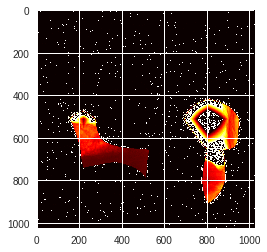

In [66]:
plt.imshow(heatmaps[0][:,:,0], cmap='hot', interpolation='nearest')

In [ ]:
df_predicted = pd.read_table('./bounding_box.txt', sep=' ', header=None)

In [58]:
heatmap

,0,1,2,3,4,5
0,12c0fe21-2770-49eb-8aa1-c4aca13c1712.jpg,Target_0,0.0,0.0,0.0,0.0
1,12c0fe21-2770-49eb-8aa1-c4aca13c1712.jpg,Target_0,123.4,73.1,0.0,0.0
2,12c0fe21-2770-49eb-8aa1-c4aca13c1712.jpg,Target_0,342.9,73.1,0.0,0.0
3,12c0fe21-2770-49eb-8aa1-c4aca13c1712.jpg,Target_0,329.1,77.7,0.0,0.0
4,12c0fe21-2770-49eb-8aa1-c4aca13c1712.jpg,Target_0,1024.0,77.7,0.0,0.0
5,12c0fe21-2770-49eb-8aa1-c4aca13c1712.jpg,Target_0,969.1,82.3,0.0,0.0
6,12c0fe21-2770-49eb-8aa1-c4aca13c1712.jpg,Target_0,932.6,82.3,0.0,0.0
7,12c0fe21-2770-49eb-8aa1-c4aca13c1712.jpg,Target_0,854.9,86.9,0.0,0.0
8,12c0fe21-2770-49eb-8aa1-c4aca13c1712.jpg,Target_0,813.7,86.9,0.0,0.0
9,12c0fe21-2770-49eb-8aa1-c4aca13c1712.jpg,Target_0,621.7,96.0,0.0,0.0


In [22]:
ls

 bbox_data.csv                          stage_1_detailed_class_info.csv
 best_auroc.log                         stage_1_sample_submission.csv
 best_weights_trf_learn_1.h5            stage_1_test_images/
 bounding_box_test.txt                  stage_1_test_images_jpg/
 bounding_box.txt                       stage_1_train_images/
 cam/                                   stage_1_train_images_jpg/
 cam_2/                                'stage_1_train_images_jpg (1)'/
 cam_3/                                 stage_1_train_labels.csv
 combined/                              stage_1_train_labels_ssd.csv
 counts.csv                             stage_1_validation_labels_ssd.csv
 data.pkl                               stage_1_val_labels_ssd.csv
 dev.csv                                stage_1_val_labels_ssd.gsheet
'GCP Credits Request Link - RSNA.txt'   test.csv
 hashed_img/                            test_images/
 heatmaps.txt                           test_results.csv
 heat_results_fixed.csv      

In [ ]:
#### Get Metrics on validation set

In [528]:
m3 = load_model('./best_weights_trf_learn_1.h5')

In [44]:
df_dev = pd.read_csv('./dev.csv')

In [45]:
print("** load test generator **")

val_sequence = AugmentedImageSequence(
    dataset_csv_file="./dev.csv",
    class_names=class_names,
    source_image_dir='./stage_1_train_images_jpg',
    batch_size=32,
    target_size=(image_dimension, image_dimension),
    augmenter=None,
    steps=validation_steps,
    shuffle_on_epoch_end=False,
)

print("** make prediction **")
#y_hat = m3.predict_generator(val_sequence, verbose=1)
#y = test_sequence.get_y_true()

** load test generator **
** make prediction **


In [46]:
image_output_dir = "./cam_validation"
if not os.path.isdir(image_output_dir):
    os.mkdir(image_output_dir)

In [47]:
model = m3

In [48]:
df_val_images['Target'] = df_val_images['Finding Labels']

In [49]:
import cv2
from keras import backend as kb

In [50]:
import swifter

In [54]:
print("create CAM")
df_val_images.swifter.apply(
    lambda g: create_cam(
        df_g=g,
        output_dir=image_output_dir,
        image_source_dir='./stage_1_train_images_jpg',
        model=model,
        generator=val_sequence,
        class_names=class_names,
    ),
    axis=1,
)

create CAM
process image: 16625    a09e3acc-b0ed-4da1-9922-3d49aac9257c.jpg
15455    9709cc26-3db4-4fc4-a026-2deb53cc5bda.jpg
1067     0c68c95e-f123-4498-acd4-0cc940b59868.jpg
18143    abfe2f91-b79a-4e29-9214-fdbf158c4a5d.jpg
11889    7a778501-8cae-4471-a4e4-fd9afd50d154.jpg
21670    c4b41025-fefa-4067-91b1-886095c38629.jpg
14574    8fcbeb06-391d-4a82-b035-614d4e6abbc8.jpg
1889     1a93ba37-ec6b-4562-87b1-ca23be8a1e1e.jpg
7444     570a22d5-ff87-4d9f-8025-f9093d99aad7.jpg
24767    de6e6646-762e-497b-b798-05b74617c5f6.jpg
14999    934aab43-c449-4f2f-a468-b4d6eddae269.jpg
14476    8f0500c9-dcdd-4c0f-8ba5-452c0af5fc02.jpg
26324    eb0cc4c8-4ce7-46b9-9ad2-c4bb71fcbf59.jpg
2733     33d21874-f7b1-413c-8013-0b4a98d12fb9.jpg
26930    efa863b3-24a7-4688-9015-e656c933d04c.jpg
10027    6bf26f0a-245a-43f3-b9df-c6cb07c4dce8.jpg
Name: Image Index, dtype: object
process image: a09e3acc-b0ed-4da1-9922-3d49aac9257c.jpg
process image: 9709cc26-3db4-4fc4-a026-2deb53cc5bda.jpg
process image: 0c68c95e-f123-

KeyboardInterrupt: 

In [181]:
len(heatmaps)

1022

In [59]:
df_vals = df_val_images[:1022]

In [61]:
import skimage
from skimage.io import *
from skimage.transform import *

import scipy
import scipy.ndimage as ndimage
import scipy.ndimage.filters as filters
from scipy.ndimage import binary_dilation
import matplotlib.patches as patches

In [400]:
# ======= Plot bounding box =========
img_width, img_height = 224, 224
img_width_exp, img_height_exp = 1024, 1024

crop_del = 16
rescale_factor = 1024/224

class_index = ['Target_0','Target_1']
avg_size = np.array([[0.0, 0.0, 0.0, 0.0],
                     [391.4, 363.1, 220.8, 334.2]])


prediction_dict = {}
for i in range(len(df_vals)):
    prediction_dict[i] = []

for i, img_id, k, npy in zip(range(len(df_vals)), df_vals['Image Index'], df_vals['Target'], heatmaps):
    
    data = npy
    img_fname = img_id

    # output avgerge
    prediction_sent = '%s %.1f %.1f %.1f %.1f' % (class_index[k], avg_size[k][0], avg_size[k][1], avg_size[k][2], avg_size[k][3])
    prediction_dict[i].append(prediction_sent)

    if np.isnan(data).any():
        continue

    w_k, h_k = (avg_size[k][2:4] * (224 / 1024)).astype(np.int)
    #print(k)
    # Find local maxima
    neighborhood_size = 100
    threshold = .9
    
    data_max = filters.maximum_filter(data, neighborhood_size)
    maxima = (data == data_max)
    data_min = filters.minimum_filter(data, neighborhood_size)
    diff = ((data_max - data_min) > threshold)
    maxima[diff == 0] = 0
    for _ in range(5):
        maxima = binary_dilation(maxima)
    
    labeled, num_objects = ndimage.label(maxima)
    #print(num_objects)
    slices = ndimage.find_objects(labeled)
    xy = np.array(ndimage.center_of_mass(data, labeled, range(1, num_objects+1)))
    #print(xy.shape)
        
    for pt in xy:
        if data[int(pt[0]), int(pt[1])] > np.max(data)*.9:
            upper = int(max(pt[0]/rescale_factor-(h_k/2), 0.))
            #print('u',upper)
            left = int(max(pt[1]/rescale_factor-(w_k/2), 0.))
            #print('l',left)
            right = int(min(left+w_k, img_width))
            #print('r',right)
            lower = int(min(upper+h_k, img_height))
            #print('lö',lower)
            
            prediction_sent = '%s %.1f %.1f %.1f %.1f' % (class_index[k], (left+crop_del)*rescale_factor, \
                                                                          (lower+crop_del)*rescale_factor, \
                                                                          (right-left)*rescale_factor, \
                                                                          (lower-upper)*rescale_factor)
            
            prediction_dict[i].append(prediction_sent)

with open("bounding_box_validation.txt","w") as f:
	for i in range(len(prediction_dict)):
		fname = df_vals['Image Index'].iloc[i]
		prediction = prediction_dict[i]

		print(fname, len(prediction))
		#f.write('%s %d\n' % (fname, len(prediction)))

		for p in prediction:
			f.write(fname+' '+ p+"\n")

a09e3acc-b0ed-4da1-9922-3d49aac9257c.jpg 1
9709cc26-3db4-4fc4-a026-2deb53cc5bda.jpg 1
0c68c95e-f123-4498-acd4-0cc940b59868.jpg 1
abfe2f91-b79a-4e29-9214-fdbf158c4a5d.jpg 1
7a778501-8cae-4471-a4e4-fd9afd50d154.jpg 1
c4b41025-fefa-4067-91b1-886095c38629.jpg 1
8fcbeb06-391d-4a82-b035-614d4e6abbc8.jpg 1
1a93ba37-ec6b-4562-87b1-ca23be8a1e1e.jpg 1
570a22d5-ff87-4d9f-8025-f9093d99aad7.jpg 1
de6e6646-762e-497b-b798-05b74617c5f6.jpg 1
934aab43-c449-4f2f-a468-b4d6eddae269.jpg 1
8f0500c9-dcdd-4c0f-8ba5-452c0af5fc02.jpg 1
eb0cc4c8-4ce7-46b9-9ad2-c4bb71fcbf59.jpg 1
33d21874-f7b1-413c-8013-0b4a98d12fb9.jpg 1
efa863b3-24a7-4688-9015-e656c933d04c.jpg 1
6bf26f0a-245a-43f3-b9df-c6cb07c4dce8.jpg 2
bdf0efcb-841f-442b-b1eb-3d4f9b2d959e.jpg 1
05fe7d73-5c8c-4349-88c4-2071a00d6d81.jpg 2
1703014f-cb4e-43c2-893d-288d087aafbd.jpg 1
46742c7c-75ab-499f-9fa3-2a99915e6738.jpg 1
8ec959f3-27f9-43dc-98d0-dfa7ddf7d9e9.jpg 1
65634398-84ef-4ccc-b958-702862c4d4fd.jpg 1
d44dd021-1a9b-4250-a560-ae745a511fb1.jpg 1
d398a439-a1

In [401]:
df_boxes = pd.read_table('./bounding_box_validation.txt', sep=' ', header=None, names=['patientId','label','x','y','w','h'])

In [402]:
mask = df_boxes['label']=='Target_0'

In [403]:
df_boxes_mask = df_boxes[['x','y','w','h']].where(~mask, other=0)

In [404]:
df_boxes[['x','y','w','h']] = df_boxes_mask[['x','y','w','h']]

In [405]:
df_boxes['Target'] = pd.Series([1 if df_boxes['label'][i][-1]==1 else 0 for i in range(len(df_boxes['label']))])

In [406]:
len(df_boxes.patientId.unique())

1012

In [407]:
df_boxes = df_boxes.sort_values('patientId')

In [408]:
df_labels = pd.read_csv('./stage_1_train_labels.csv').fillna(0)

In [409]:
df_labels[df_labels['Target']==1][['x','y','width','height']].mean()

x         391.456158
y         363.135877
width     220.845382
height    334.174364
dtype: float64

In [410]:
df_val_images['label'] = df_val_images['Finding Labels']

In [411]:
names = df_boxes['patientId'].apply(lambda x: x.replace('.jpg','')).unique()

In [412]:
df_labels.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0.0,0.0,0.0,0.0,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,0.0,0.0,0.0,0.0,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,0.0,0.0,0.0,0.0,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,0.0,0.0,0.0,0.0,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [413]:
df_val_labels = df_labels[df_labels['patientId'].isin(names)]

In [414]:
df_val_labels = df_val_labels.sort_values('patientId')

In [415]:
len(df_val_labels)

1261

In [416]:
len(df_boxes)

1261

In [417]:
df_boxes['boxes'] = df_boxes[['x', 'y', 'w', 'h']].values.tolist()

In [418]:
df_val_labels['boxes'] = df_val_labels[['x', 'y', 'width', 'height']].values.tolist()

In [419]:
y_pred = df_boxes.groupby('patientId')['boxes'].apply(list)

In [420]:
y_true = df_val_labels.groupby('patientId')['boxes'].apply(list)

In [494]:
y_true.shape

(1012,)

In [495]:
y_pred.shape

(1012,)

In [490]:
def bb_intersection_over_union(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[0]+boxA[2], boxB[0]+boxB[2])
    yB = min(boxA[1]+boxA[3], boxB[1]+boxB[3])
    
    if xA == 0 and yA == 0 and xB == 0 and yB == 0:
        return 0

    # compute the area of intersection rectangle
    interArea = (xB - xA) * (yB - yA)
    #print(interArea)

    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = (boxA[0]+boxA[2] - boxA[0]) * (boxA[1]+boxA[3] - boxA[1])
    boxBArea = (boxB[0]+boxB[2] - boxB[0]) * (boxB[1]+boxB[3] - boxB[1])
    
    if boxAArea + boxBArea - interArea < interArea:
      return 0

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea + 1)
    #print(iou)


    # return the intersection over union value
    return iou

In [491]:
bb_intersection_over_union([571.4, 275.1, 230.8, 476.2], [571.4, 275.1, 230.8, 476.2])

0.9999909014779276

In [444]:
for i in itertools.product(y_true[0], y_pred[0], range(1)):
    print(i[0])

[181.0, 184.0, 206.0, 506.0]
[571.0, 275.0, 230.0, 476.0]


In [434]:
list(c)

[([391.4, 363.1, 220.8, 334.2], [181.0, 184.0, 206.0, 506.0])]

In [437]:
import itertools

In [492]:
results = []
for k in range(len(y_true)):
    for i in itertools.product(y_true[k], y_pred[k], range(1)):
        #print(i)
        results.append(bb_intersection_over_union(i[0],i[1]))

In [493]:
np.mean(results)

0.01755873843843314